In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv
/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
joebiden = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv',encoding='latin-1', engine='python')

In [6]:
donaldtrump = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv',encoding='latin-1', engine='python')


In [26]:
columns = ['Date and time of tweet creation', 'Unique ID of the tweet', 'tweet', 'likes', 'Number of retweets', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',"Text","text","tweets"
       'user_join_date', 'user_followers_count', 'location', 'Latitude of location',"Trump","Biden",
       'Longitude of location', 'city', 'country', 'continent', 'state', 'state_code',"Donald Trump","Joe Biden"]

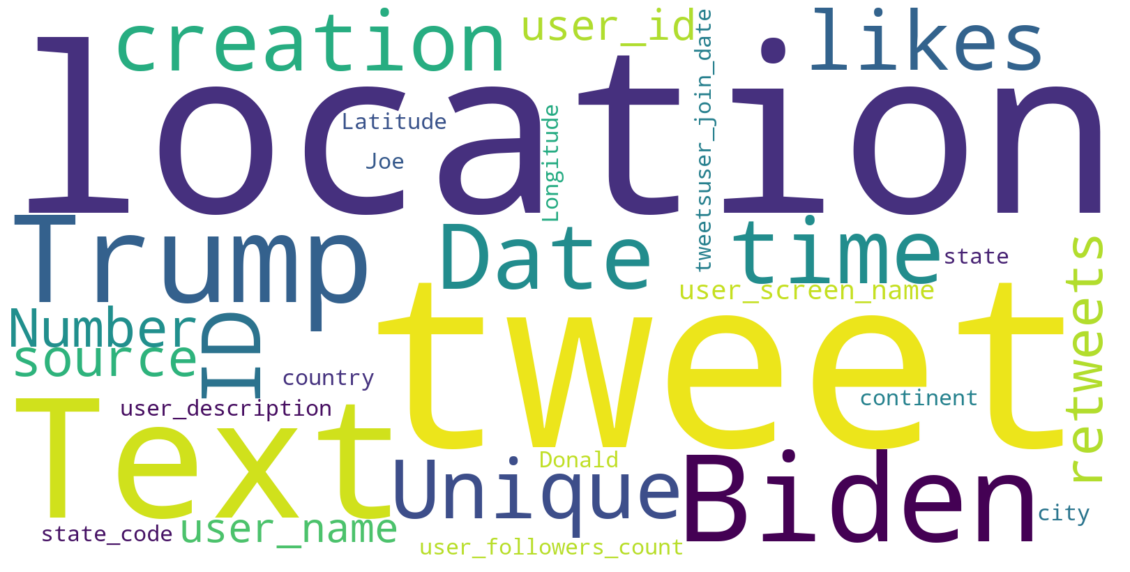

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.figure(figsize=(20,20))
cloud = WordCloud(background_color="white", min_font_size = 3,stopwords= stop, max_words = 3000 , width = 1600 , height = 800).generate(" ".join(columns))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# finding missing values and remove some of them

In [7]:
joebiden.dropna(inplace = True, how= 'all',axis = 'rows')
joebiden.dropna(subset = ['collected_at','retweet_count'],how = 'any',inplace = True, axis = 'rows')


In [8]:
donaldtrump.dropna(inplace = True, how= 'all',axis = 'rows')
donaldtrump.dropna(subset = ['collected_at','retweet_count'],how = 'any',inplace = True, axis = 'rows')


In [9]:
rows_biden = joebiden.shape[0]
rows_trump = donaldtrump.shape[0]
rows_biden

776777

In [12]:

sumat = rows_trump+rows_biden

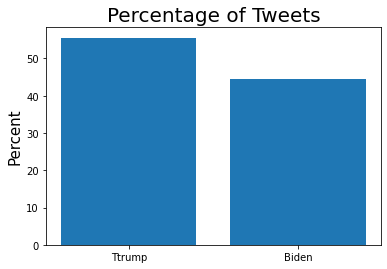

In [29]:
a = (rows_trump/sumat)*100
b = (rows_biden/sumat)*100
plt.bar(["Ttrump","Biden"],[a,b])#
plt.title("Percentage of Tweets", fontsize = 20)
plt.ylabel("Percent",fontsize = 15)
plt.xticks(["Ttrump","Biden"],fontsize = 15)
plt.show()

In [ ]:

na_trump = (np.sum(pd.isna(donaldtrump))/rows_trump)*100
na_biden = (np.sum(pd.isna(joebiden))/rows_biden )*100


In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(131)
sns.barplot( na_trump.values,na_trump.index, orient = 'h');
plt.title('PERCENTAGE OF MISSING VALUES, DONALD TRUMP',fontsize = 15)
plt.subplot(133)
sns.barplot( na_biden.values,na_biden.index, orient = 'h');
plt.title('PERCENTAGE OF MISSING VALUES, JOE BIDEN',fontsize = 15)
plt.show()

In [ ]:
# trump-retweets
retweets_trump = donaldtrump.retweet_count.value_counts().reset_index()
sum_retweets = np.sum(retweets_trump.retweet_count)
print('The sum of retweets:',sum_retweets)

retweets_trump['percent'] = (retweets_trump.retweet_count/sum_retweets)*100
retweets_trump

In [ ]:
#biden-retweets
retweets_biden = joebiden.retweet_count.value_counts().reset_index()
sum_retweets_biden = np.sum(retweets_biden.retweet_count)
print('THe sum of retweets:',sum_retweets_biden)

retweets_biden['percent'] = (retweets_biden.retweet_count/sum_retweets_biden)*100
retweets_biden


In [ ]:
labels = ['0-retweet','1-retweet', '2-retweets','3-retweets','more than-3-retweets']


In [ ]:
percent_trump = retweets_trump.iloc[:4,2]
last_value = np.sum(retweets_trump.iloc[4:,2])
percent_trump = np.append(percent_trump.values,last_value)
percent_trump = percent_trump.tolist()

In [ ]:
percent_biden = retweets_biden.iloc[:4,2]
last_value = np.sum(retweets_biden.iloc[4:,2])
percent_biden = np.append(percent_biden.values,last_value)
percent_biden = percent_biden.tolist()

In [ ]:

plt.subplots(figsize = (20,20))
plt.subplot(131)
plt.pie(percent_trump, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
plt.title('The Percentage of Retweets-Donald Trump',fontsize = 20)

plt.subplot(133)
plt.pie(percent_biden, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
plt.title('The Percentage of Retweets-Joe Biden',fontsize = 20)
plt.show()

convert string to int values

In [ ]:
donaldtrump['likes'] = donaldtrump.likes.astype(np.float)
donaldtrump['likes'] = donaldtrump.likes.astype(np.int)

In [ ]:
joebiden['likes'] = joebiden.likes.astype(np.float)
joebiden['likes'] = joebiden.likes.astype(np.int)

In [ ]:
like_trump = donaldtrump[['tweet', 'likes']]
like_trump['name'] = "trump"
like_trump.dropna(how= 'any', axis = 'rows',inplace = True)
np.sum(like_trump.isna())
like_trump = like_trump.sort_values(by =['likes'], ascending =False).head(20)

In [ ]:
like = joebiden[['tweet', 'likes']]
like['name'] = 'biden'
like.dropna(how= 'any', axis = 'rows',inplace = True)
np.sum(like.isna())
like = like.sort_values(by =['likes'], ascending =False).head(20)

In [ ]:
import seaborn as sns
sns.barplot()

In [ ]:
plt.figure(figsize = (8,8))
like_trump.sort_values(by =['likes'], ascending =False).head(20).plot(kind = 'bar')
plt.title('TOP 20 LIKES, Donald Trump', fontsize = 15)
plt.ylabel('Count of Likes')
plt.xlabel('Index Number of Tweets')
plt.show()
# plt.barh(like_sort.values[:,0], like_sort.values[:,1])

In [ ]:
plt.figure(figsize = (15,15))
like.sort_values(by =['likes'], ascending =False).head(20).plot(kind = 'bar')
plt.title('TOP 20 LIKES, JOE BIDEN', fontsize = 15)
plt.ylabel('Count of Likes')
plt.xlabel('Index Number of Tweets')
plt.show()
# plt.barh(like_sort.values[:,0], like_sort.values[:,1])

# Clean tweets

In [ ]:
text = joebiden.tweet[7]
text

In [ ]:
import re
def clean(text):
    def pad_str(s):
        print()
        return ' '+s+' '
    
    if pd.isnull(text):
        return ''
        
    if type(text) != str or text=='':
        return ''

    text = re.sub("https://\w*.\w*/\w*",'',text)
    text = text.replace("[a-zA-Z]\s+t",'not')
    text = text.replace("[a-zA-Z]â\x80\x99t",'not')
    text = text.replace("don't",'do not')
    text = text.replace("doesn't",'does not')
    text = text.replace("It's",'it is')
    text = text.replace("haven't",'have not')
    text = text.replace("hasn't",'has not')
    text = text.replace("can't",'can not')
    text = text.replace("what's",'what is')
    text = text.replace("aren't",'are not')
    text = text.replace("aren't",'are not')
    text = text.replace("wasn't",'was not')
    text = text.replace("won\s+t",'would not')
    text = text.replace("wouldn't",'would not')
    text = text.replace("weren't",'were not')
    text = text.replace("%",'percent ')
    text = text.replace("$",'dollars ')
    text = re.sub("I've", 'I have',text)
#     text = re.sub("will",' ',text)
    text = re.sub("amp",' ',text)

    text = re.sub("\s+u\s+",' you ',text)
    text = re.sub("\s+U\s+",' you ',text)
    text = re.sub("realDonaldTrump",'',text)
    text = re.sub("[Tt]rump",'',text)
    text = re.sub("realDonaldTrump",'',text)
    text = re.sub("[Bb]iden",'',text)
    text = re.sub("[Jj]oe\s*[Bb]iden",'',text)
    text = re.sub("[Dd]onald\s*[Tt]rump",'',text)
    text = re.sub('[^a-zA-Z0-9\s]',' ',text)
    text = re.sub(r'\s\s+',' ',text)
    
#     text = re.findall('\s$',text)
    
    return text
clean(text)

In [ ]:
donaldtrump['tweet'] = donaldtrump.tweet.apply(clean)

In [ ]:
joebiden['tweet'] = joebiden.tweet.apply(clean)

# stopwords & Stem

In [13]:
import string
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
import nltk
from nltk.stem import PorterStemmer

In [ ]:
def stem(text):
    corpus = []
    text = text.lower()
    for word in text.split():
        if word.strip().lower() not in stop:
            ps = PorterStemmer()
            word = ps.stem(word)
            corpus.append(word.lower())
    return ' '.join(corpus)
# stem(text)


In [ ]:
donaldtrump['tweet'] = donaldtrump.tweet.apply(stem)  


In [ ]:
joebiden['tweet'] = joebiden.tweet.apply(stem)  


# Word cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.figure(figsize=(20,20))
cloud = WordCloud(background_color="white", min_font_size = 3,stopwords= stop, max_words = 3000 , width = 1600 , height = 800).generate(" ".join(donaldtrump.tweet))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=(20,20))
wc = WordCloud(background_color="white", min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(joebiden.tweet))
plt.axis("off")
plt.imshow(wc,interpolation = 'bilinear')

# Text Classification by TextBlob

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [ ]:
from textblob import TextBlob
# from textblob.sentiments import NaiveBayesAnalyzer

def textblob(text):
    testimonial = TextBlob(text)
    if testimonial.sentiment.polarity == 0:
        return 'neutral'
    elif testimonial.sentiment.polarity > 0:
        return 'positive'
    else:
        return 'negative'
textblob("I am so happy with you")


In [ ]:
donaldtrump['emotions'] = donaldtrump.tweet.apply(textblob)

In [ ]:
joebiden['emotions'] = joebiden.tweet.apply(textblob)

In [ ]:
def textblob_opinion(text):
    testimonial = TextBlob(text)
    if testimonial.sentiment.subjectivity >= 0.5:
        return 'public opinion'
    else:
        return 'factual information'
# textblob("I am so happy with you")


In [ ]:
donaldtrump['subjectivity'] = donaldtrump.tweet.apply(textblob_opinion)

In [ ]:
joebiden['subjectivity'] = joebiden.tweet.apply(textblob_opinion)

In [ ]:
joebiden.head(5)

In [ ]:
emotions_trump = donaldtrump.emotions.value_counts().reset_index()
sum_emot = np.sum(emotions_trump.emotions)
emotions_trump['percent'] = (emotions_trump.emotions/sum_emot)*100
emotions_trump

In [ ]:
emotions_biden = joebiden.emotions.value_counts().reset_index()
sum_emot = np.sum(emotions_biden.emotions)
emotions_biden['percent'] = (emotions_biden.emotions/sum_emot)*100
emotions_biden

In [ ]:
plt.subplots(figsize = (13,13))
labels = ['Neutral', 'Positive', 'Negative']

plt.subplot(121)
plt.pie(emotions_trump.percent, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
plt.title('The Percentage of Positive & Negative Statement \n Tweets of Mr Trump',fontsize = 15)

plt.subplot(122)
plt.pie(emotions_biden.percent, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
plt.title('The Percentage of Positive & Negative Statement \n Tweets of Mr Biden',fontsize = 15)
plt.show()

In [ ]:
subjectivity_trump = donaldtrump.subjectivity.value_counts().reset_index()
sum_sub = np.sum(subjectivity_trump.subjectivity)
subjectivity_trump['percent'] = (subjectivity_trump.subjectivity/sum_sub)*100
subjectivity_trump

In [ ]:
subjectivity_biden = joebiden.subjectivity.value_counts().reset_index()
sum_sub = np.sum(subjectivity_biden.subjectivity)
subjectivity_biden['percent'] = (subjectivity_biden.subjectivity/sum_sub)*100
subjectivity_biden

In [ ]:
plt.subplots(figsize = (15,15)) 
labels = ['Factual Information', 'Public Opinion']

plt.subplot(131)
plt.pie(subjectivity_trump.percent, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('The Percentage of Personal Opinion, Emotion or Judgment \n Tweets of Mr Trump',fontsize = 15)

plt.subplot(133)
plt.pie(subjectivity_biden.percent, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
plt.title('The Percentage of Personal Opinion, Emotion or Judgment \n Tweets of Joe Biden',fontsize = 15)
plt.show()

In [ ]:
donaldtrump["name"] = "trump"
joebiden["name"] = "biden"


In [ ]:
country_trump = donaldtrump[["name", "emotions", "subjectivity", "country","state", "created_at"]]
country_biden = joebiden[["name", "emotions", "subjectivity", "country","state","created_at"]]
countries = pd.concat([country_trump,country_biden], axis = "rows")
countries


In [ ]:
countries.dropna(inplace = True, how= 'any',axis = 'rows')


In [ ]:
df = countries[countries.country == 'United States of America']
df

In [ ]:
rows = df.shape[0]
sns.set(font_scale=1.3)
sns.heatmap((pd.crosstab([df.emotions],[df.name])/rows)*100,annot_kws={"size": 15})
plt.title("The Percentage of Positive & Negative Statement\n Mr Biden & Mr Trump- USA", fontsize = 17)

In [ ]:
sns.set(font_scale=1.3)
sns.heatmap((pd.crosstab([df.subjectivity],[df.name])/rows)*100)


In [ ]:
joebiden.created_at.value_counts()

In [ ]:
df.emotions

In [ ]:
(pd.crosstab([df.state],[df.emotions])/df.shape[0])*100

In [ ]:
plt.figure(figsize = (10,10))
sns.set(font_scale=1.3)
sns.heatmap((pd.crosstab([df.state],[df.emotions])/df.shape[0])*100,annot=False,cmap="YlGnBu")
plt.title("Percentage of Participation in Tweeter", fontsize = 20)

In [ ]:
plt.figure(figsize = (15,15))
date = countries.created_at.value_counts()
date = pd.DataFrame(date.values,date.index)
# date.columns()
date.head(20).plot(kind = 'bar')

In [ ]:
# countries["time"] = 
countries.created_at.
# countries["time"].value_counts()

# Clustering datasets

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words="english")
vec.fit(donaldtrump.tweet.values)
features = vec.transform(donaldtrump.tweet.values)

In [ ]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(joebiden.tweet.values)
features = vec.transform(joebiden.tweet.values)

# finding optimal number of clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

mini_inertia = []
for k in range(2,8):
    mini_batch_km = MiniBatchKMeans(n_clusters= k)
    mini_batch_km.fit(features)
    mini_inertia.append(mini_batch_km.inertia_)


In [ ]:
plt.figure(figsize = (8,6))
plt.plot(range(2,8),mini_inertia,'g')
plt.title("Optimal Number of Clusters in KMeans Algorithm",fontsize = 20)
plt.xlabel("Number of Clusters")
plt.ylabel("Cost Function")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(features)

In [ ]:
pred = kmeans.predict(features)
donaldtrump['Cluster'] = pred
donaldtrump

In [ ]:
pred = kmeans.predict(features)
joebiden['Cluster'] = pred
joebiden

In [ ]:
def build_wordcloud(df, title):
    wordcloud = WordCloud(
        background_color='white', 
        stopwords=set(STOPWORDS), 
        max_words=50, 
        max_font_size=40, 
        random_state=666
    ).generate(str(df))

    fig = plt.figure(1, figsize=(14,14))
    plt.axis('off')
    fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
build_wordcloud(donaldtrump[donaldtrump['Cluster'] == 0]['tweet'], 'Wordcloud for cluster 0')


In [ ]:
build_wordcloud(donaldtrump[donaldtrump['Cluster'] == 1]['tweet'], 'Wordcloud for cluster 1')


In [ ]:
build_wordcloud(joebiden[joebiden['Cluster'] == 0]['tweet'], 'Wordcloud for cluster 0')


In [ ]:
build_wordcloud(joebiden[joebiden['Cluster'] == 1]['tweet'], 'Wordcloud for cluster 1')


In [ ]:
build_wordcloud(joebiden[joebiden['Cluster'] == 2]['tweet'], 'Wordcloud for cluster 2')


In [ ]:
build_wordcloud(joebiden[joebiden['Cluster'] == 3]['tweet'], 'Wordcloud for cluster 3')


In [ ]:
build_wordcloud(joebiden[joebiden['Cluster'] == 4]['tweet'], 'Wordcloud for cluster 4')


In [ ]:
build_wordcloud(joebiden[joebiden['Cluster'] == 5]['tweet'], 'Wordcloud for cluster 5')
